# CNN_ 전이학습: ResNet50 모델 활용

In [1]:
# 사용 데이터셋- CIFAR10 데이터셋 (by keras)
# 10개의 클래스(비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭) 이미지 데이터

# 1. 환경 설정

In [6]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.layers import BatchNormalization

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)  

# 2. 데이터셋 준비

In [12]:
# CIFAR10 이미지 데이터셋
from tensorflow.keras import datasets
cifar10 = datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
X_train.shape

(50000, 32, 32, 3)

#### 데이터 샘플 수 조정

In [13]:
# 피처 스케일링
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train.shape

(50000, 32, 32, 3)

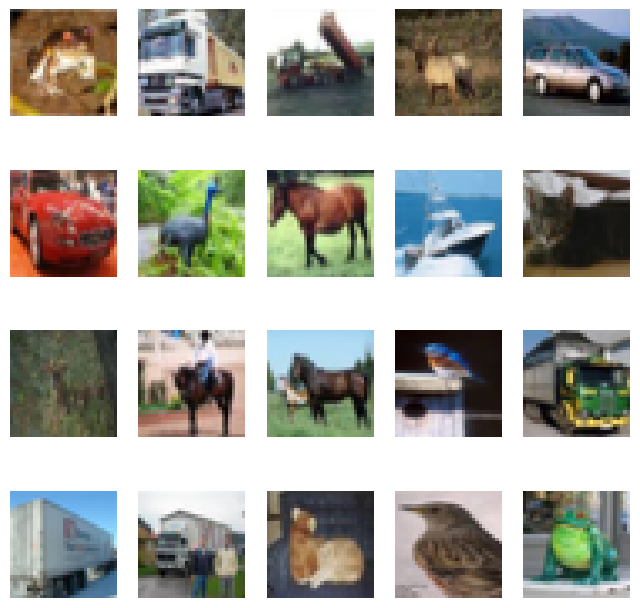

In [16]:
# Train 이미지 출력하기(처음부터 20개)
plt.figure(figsize=(8, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

# 3. 모델 구축: 일반 합성곱 신경망 

In [ ]:
#sparse_categorical_crossentropy :목표 레이블이 원핫 인코딩 처리 없이 1개의 열에
#  0, 1, 2~ 9 로 입력되어 있는 경우
# 배치 정규화 레이어 - 딥러닝에서 각 레이어를 거칠 때마다 입출력 데이터의 분포가 변화되는데
# 배치 정규화를 통하면 정규분포와 비슷한 형태로 변환해주어 빠르고 안정적인 학습을 하는데 효과


In [ ]:
# 모델 학습

In [ ]:
first_history = pd.DataFrame(cnn_history.history)
first_history

In [ ]:
# 손실함수와 정확도 시각화

# 4. 전이 학습: ResNet50 모델 활용하기

In [17]:
# Pre-trained 모델 가져오기 
from tensorflow.keras.applications import ResNet50
cnn_base = ResNet50(include_top=False, weights='imagenet', 
                input_shape=[32, 32, 3])  

94765736/94765736 [==============================] - 9s 0us/step


In [18]:
from tensorflow.keras.layers import Activation
from keras.models import Model
# 끝의 4개 층만 동결 해제
for layer in cnn_base.layers[:-4]:
    layer.trainable=False
    
# 모델 생성 및 학습
pre_trained_model = cnn_base.output
flat = Flatten()(pre_trained_model)
dense1 = Dense(256)(flat)
batch = BatchNormalization()(dense1)
act1 = Activation('relu')(batch)
prediction = Dense(10, activation='softmax')(act1)

transfer_model = Model(inputs=cnn_base.input, outputs = prediction)

transfer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [19]:
transfer_model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [21]:
tm_history = transfer_model.fit(X_train, y_train, batch_size=256, epochs=10, \
    validation_split=0.1, verbose=2)

Epoch 1/10
176/176 - 89s - loss: 1.7277 - accuracy: 0.3923 - val_loss: 3.4971 - val_accuracy: 0.1348 - 89s/epoch - 507ms/step
Epoch 2/10
176/176 - 95s - loss: 1.5397 - accuracy: 0.4574 - val_loss: 3.1994 - val_accuracy: 0.1700 - 95s/epoch - 540ms/step
Epoch 3/10
176/176 - 92s - loss: 1.4615 - accuracy: 0.4846 - val_loss: 3.2043 - val_accuracy: 0.1760 - 92s/epoch - 523ms/step
Epoch 4/10
176/176 - 96s - loss: 1.4116 - accuracy: 0.5011 - val_loss: 4.1317 - val_accuracy: 0.1622 - 96s/epoch - 545ms/step
Epoch 5/10
176/176 - 95s - loss: 1.3634 - accuracy: 0.5184 - val_loss: 3.6296 - val_accuracy: 0.1318 - 95s/epoch - 540ms/step
Epoch 6/10
176/176 - 91s - loss: 1.3171 - accuracy: 0.5346 - val_loss: 4.9166 - val_accuracy: 0.1744 - 91s/epoch - 515ms/step
Epoch 7/10
176/176 - 91s - loss: 1.2839 - accuracy: 0.5448 - val_loss: 4.1093 - val_accuracy: 0.1724 - 91s/epoch - 515ms/step
Epoch 8/10
176/176 - 94s - loss: 1.2489 - accuracy: 0.5574 - val_loss: 3.0156 - val_accuracy: 0.2292 - 94s/epoch - 537